## Data 620 - Week 8

### Team No. 6

- Yohannes Deboch
- Sherranette Tinapunan

### Video Presentation

[URL to be entered]


### Assignment

In this week's assignment, you are asked to analyze high frequency words.
Please answer the fo llowing questions in an Jupyter Notebook, posted to GitHub.
1.	Choose a corpus of interest.
2.	How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way).
3.	Taking the most common words, how many unique words represent half of the total words in the corpus?Identify the 200 highest frequency words in this corpus.
4.	Create a graph that shows the relative frequency of these 200 words.
5.	Does the observed relative frequency of these words follow Zipf’s law? Explain.
6.	In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

----


In [67]:
import nltk
import pandas as pd
from nltk.corpus import gutenberg
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
#nltk.download('gutenberg')
#nltk.download('punkt') #sentence tokenizer
#nltk.download('stopwords')

### (1) Choose a corpus of interest.

The text 'austen-emma.txt' contains <b>192,427</b> words (not unique and before any word removal)

In [22]:
emma = gutenberg.words('austen-emma.txt')
len(emma)

192427

There are <b>7,811</b> unique words. 

In [58]:
len(set(emma))

7811

### (2) How many total unique words are in the corpus?  
(Please feel free to define unique words in any interesting, defensible way).

We're interested in the unique count of words that do not include stopwords in the Engligh language. We also removed words that have length of less than 3. You will see a list of these words below. Punctuations were also removed.

In [60]:
# Stopwords
stopwords_english = stopwords.words('english')

# Remove puncatuation/ and any characters that are not letters
words = [word for word in emma if word.isalpha()]

# Remove stopwords
words = [w.lower() for w in words if w.lower() not in stopwords_english]

#unique words
unique_words = list(set(words)) 

#calculate length of words
df_words = pd.DataFrame(unique_words)
df_words.columns = ['word']
df_words['word_len'] = df_words['word'].apply(lambda x: len(x))

#print words that have length of less than 3
print(df_words[df_words['word_len']<3].sort_values(by='word_len'))

     word  word_len
3543    v         1
3430    l         1
4189    k         1
4334    c         1
3048    e         1
2683    f         1
6636    w         1
524     n         1
3833    x         1
5605   mr         2
5541   la         2
3876   dr         2
4600   us         2
6449   oh         2
6718   vi         2
4095   se         2
6162   st         2
102    en         2
6756   al         2
3452   ii         2
3309   xv         2
3231   ah         2
2957   de         2
2428   ix         2
2044   xi         2
1836   iv         2
1684   go         2
854    ox         2
243    ye         2
3875   ha         2
6885   em         2


In [62]:
#Remove words that 
remove_extra = ['v', 'em', 'l','k','c','e','f','w','n','x','mr','la','dr','us','oh','vi','se',
                       'st','en','al','ii','xv','ah','de','ix','xi','iv','go','ox','ye','ha']

#Remove words that are in remove_extra
words = [w.lower() for w in words if w.lower() not in remove_extra]

Let's take a look if there are any remaining words that are less than 3 characters. 

In [63]:
#unique words
unique_words = list(set(words)) 

#calculate length of words
df_words = pd.DataFrame(unique_words)
df_words.columns = ['word']
df_words['word_len'] = df_words['word'].apply(lambda x: len(x))

#print words that have length of less than 3
print(df_words[df_words['word_len']<3].sort_values(by='word_len'))

Empty DataFrame
Columns: [word, word_len]
Index: []


#### There are 6,917 unique words in the emma text after the removal process. Originally, the text had 7,811 unique words. 

In [64]:
unique_words = set(words)
len(unique_words)

6917

### (3) Taking the most common words, how many unique words represent half of the total words in the corpus?

In [103]:
emma_freq_dist = nltk.FreqDist(words)
emma_freq_dist #nltk.probability.FreqDist

FreqDist({'emma': 865, 'could': 837, 'would': 820, 'mrs': 699, 'miss': 599, 'must': 567, 'harriet': 506, 'much': 486, 'said': 484, 'one': 452, ...})

There are 71,405 words (not unique). About half of this is 35,702.5.

In [90]:
print(len(words))
print(len(words)/2)

71405
35702.5


In [136]:
#Create Cumulative Frequency Table
df_all_words = pd.DataFrame(words)
df_all_words.columns = ['word']
df_all_words_freq = pd.DataFrame(df_all_words['word'].value_counts()).reset_index(drop=False)
df_all_words_freq.columns = ['word', 'frequency']
df_all_words_freq['cumulative_frequency'] = df_all_words_freq['frequency'].cumsum()
df_all_words_freq.sort_values(by='frequency', ascending=False).head(20)

,word,frequency,cumulative_frequency
0,emma,865,865
1,could,837,1702
2,would,820,2522
3,mrs,699,3221
4,miss,599,3820
5,must,567,4387
6,harriet,506,4893
7,much,486,5379
8,said,484,5863
9,one,452,6315


### There are 258 words that represent about half of the total words. 

In [141]:
len(df_all_words_freq[df_all_words_freq['cumulative_frequency'] <= 35703])

258

In [140]:
df_all_words_freq[df_all_words_freq['cumulative_frequency'] <= 35702.5]

,word,frequency,cumulative_frequency
0,emma,865,865
1,could,837,1702
2,would,820,2522
3,mrs,699,3221
4,miss,599,3820
5,must,567,4387
6,harriet,506,4893
7,much,486,5379
8,said,484,5863
9,one,452,6315


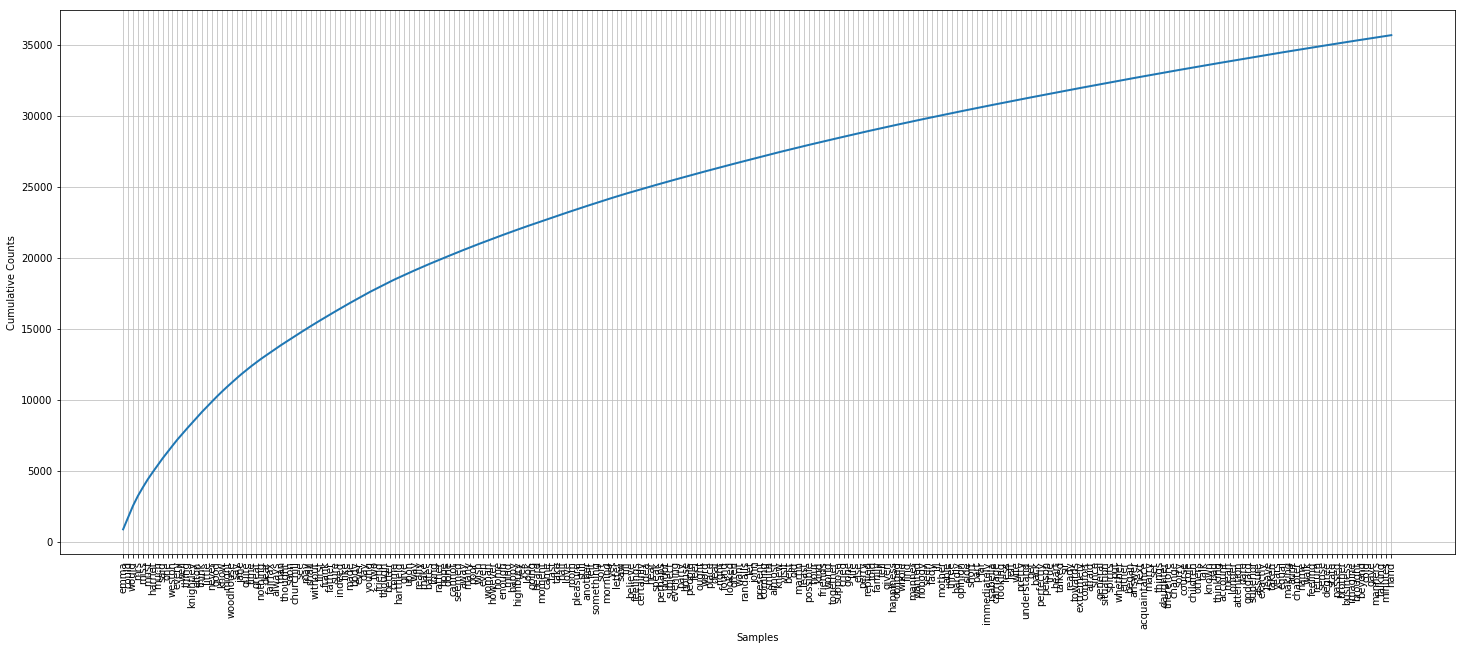

In [139]:
plt.figure(3,figsize=(25,10)) 
#%matplotlib inline
emma_freq_dist.plot(258, cumulative=True)

### Identify the 200 highest frequency words in this corpus.

In [86]:
for key,value in emma_freq_dist.most_common(200):
    print(key,value)

emma 865
could 837
would 820
mrs 699
miss 599
must 567
harriet 506
much 486
said 484
one 452
weston 440
every 435
well 401
thing 398
knightley 389
elton 385
think 383
little 359
never 358
good 358
know 337
might 326
woodhouse 313
say 310
jane 301
quite 282
time 279
great 264
nothing 256
dear 241
fairfax 241
always 238
man 235
thought 226
soon 224
churchill 224
see 222
may 221
shall 217
without 214
first 209
frank 208
father 207
sure 204
indeed 202
like 200
made 199
body 193
ever 193
day 192
young 192
two 178
friend 177
though 177
better 173
come 172
hartfield 160
give 159
upon 159
way 155
really 153
make 152
bates 148
long 146
rather 146
hope 143
done 142
cannot 142
seemed 141
away 138
many 138
poor 136
wish 135
even 132
woman 131
however 131
home 130
enough 129
mind 128
happy 125
highbury 125
yes 125
look 121
going 120
heard 120
moment 120
came 119
last 119
take 119
half 118
love 117
room 117
pleasure 115
still 115
another 114
felt 113
something 113
sort 112
morning 111
yet 109
letter

### (4) Create a graph that shows the relative frequency of these 200 words.

In [181]:
df = pd.DataFrame(emma_freq_dist.most_common(200))
df.columns = ['word', 'frequency']

In [182]:
df.head()

,word,frequency
0,emma,865
1,could,837
2,would,820
3,mrs,699
4,miss,599


In [183]:
# Calculate relative frequency
df['relative_frequency'] = df['frequency']/df['frequency'].sum()

In [185]:
df = df.reset_index(drop=False)

In [186]:
df.head(20)

,index,word,frequency,relative_frequency
0,0,emma,865,0.026788
1,1,could,837,0.025921
2,2,would,820,0.025395
3,3,mrs,699,0.021648
4,4,miss,599,0.018551
5,5,must,567,0.017560
6,6,harriet,506,0.015670
7,7,much,486,0.015051
8,8,said,484,0.014989
9,9,one,452,0.013998


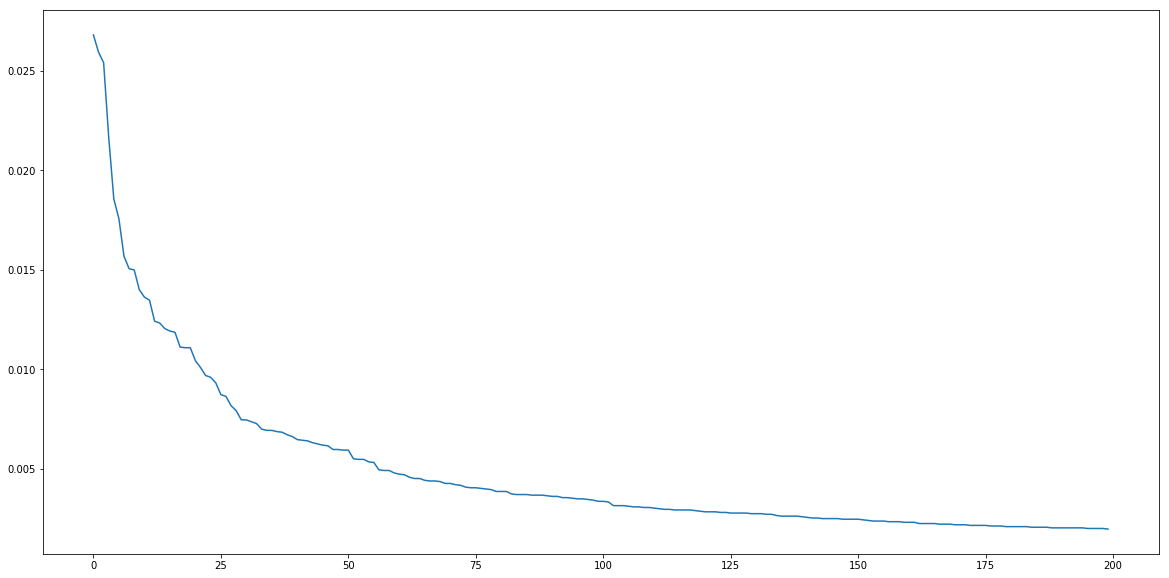

In [187]:
plt.figure(3,figsize=(20,10))
df['relative_frequency'].plot()
#plt.hist(df['word'], density=True)

### (5) Does the observed relative frequency of these words follow Zipf’s law? Explain.

In the English language, the probability of encountering the rth most common word is given roughly by P(r)=0.1/r. 

In the graph below, it looks like the 200 most common words roughly follow Zipf's law.

In [189]:
df['zip_probability'] = 0.1/(df['index'] + 1)

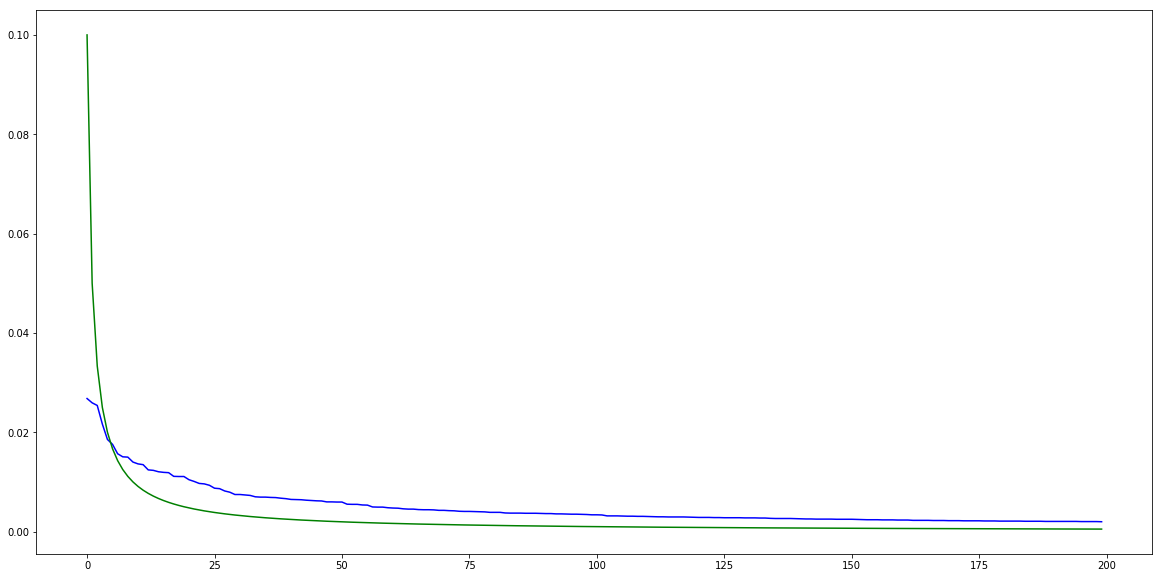

In [197]:
plt.figure(3,figsize=(20,10))
plt.plot(df['relative_frequency'], 'blue')
plt.plot(df['zip_probability'], 'green')
plt.show()

### (6) In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

One way that the frequency of the words in this specific text could differ from the frequency of "all words in all corpora" is through the writing style of the author. Certain authors probably use a set of words more frequently than other authors. Another way would be the topic of the text. A mathematical text would most likely have a different word frequency when compared to a text that talks about love and relationships. 

